## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">1| Import Libraries📚</div>

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [335]:
Anixty = pd.read_csv("Datasets/anorexia-bulimia-nervosa-estimated-cases.csv")
social_data = pd.read_csv("Datasets/train.csv")

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">2| Data Exploration</div>

In [336]:
social_data.sample(3)

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
55,56,22,Female,Whatsapp,70.0,2.0,40.0,8.0,21.0,Anxiety
649,649,32,Male,Instagram,130.0,5.0,80.0,28.0,31.0,Neutral
739,739,22,Female,Instagram,115.0,3.0,60.0,17.0,30.0,Neutral


In [337]:
social_data["Gender"].unique()

array(['Female', 'Male', 'Non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32', nan],
      dtype=object)

In [338]:
social_data.isnull().sum()

User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

In [339]:
Anixty.sample(3)

,Entity,Code,Year,"Current number of cases of anorexia nervosa, in both sexes aged all ages","Current number of cases of bulimia nervosa, in both sexes aged all ages"
4880,Portugal,PRT,2010,11195.0290,27689.300
4801,Philippines,PHL,1991,21531.1900,39583.863
3529,Malawi,MWI,2009,3689.2378,7269.517


In [340]:
Anixty.isnull().sum()

Entity                                                                        0
Code                                                                        690
Year                                                                          0
Current number of cases of anorexia nervosa, in both sexes aged all ages      0
Current number of cases of bulimia nervosa, in both sexes aged all ages       0
dtype: int64

In [341]:
Anixty.shape ,social_data.shape

((6840, 5), (1001, 10))

In [342]:
Anixty["Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [343]:
Anixty.describe()

,Year,"Current number of cases of anorexia nervosa, in both sexes aged all ages","Current number of cases of bulimia nervosa, in both sexes aged all ages"
count,6840.000000,6.840000e+03,6.840000e+03
mean,2004.500000,8.745556e+04,2.082361e+05
std,8.656074,3.253832e+05,7.750854e+05
min,1990.000000,3.493165e-01,6.473784e-01
25%,1997.000000,7.629101e+02,1.828258e+03
50%,2004.500000,3.462944e+03,8.480150e+03
75%,2012.000000,1.483365e+04,3.647230e+04
max,2019.000000,3.901694e+06,9.791067e+06


In [344]:
social_data.describe()

,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">3| Data Cleaning</div>

## Social Data

array([[<Axes: title={'center': 'Daily_Usage_Time (minutes)'}>,
        <Axes: title={'center': 'Posts_Per_Day'}>],
       [<Axes: title={'center': 'Likes_Received_Per_Day'}>,
        <Axes: title={'center': 'Comments_Received_Per_Day'}>],
       [<Axes: title={'center': 'Messages_Sent_Per_Day'}>, <Axes: >]],
      dtype=object)

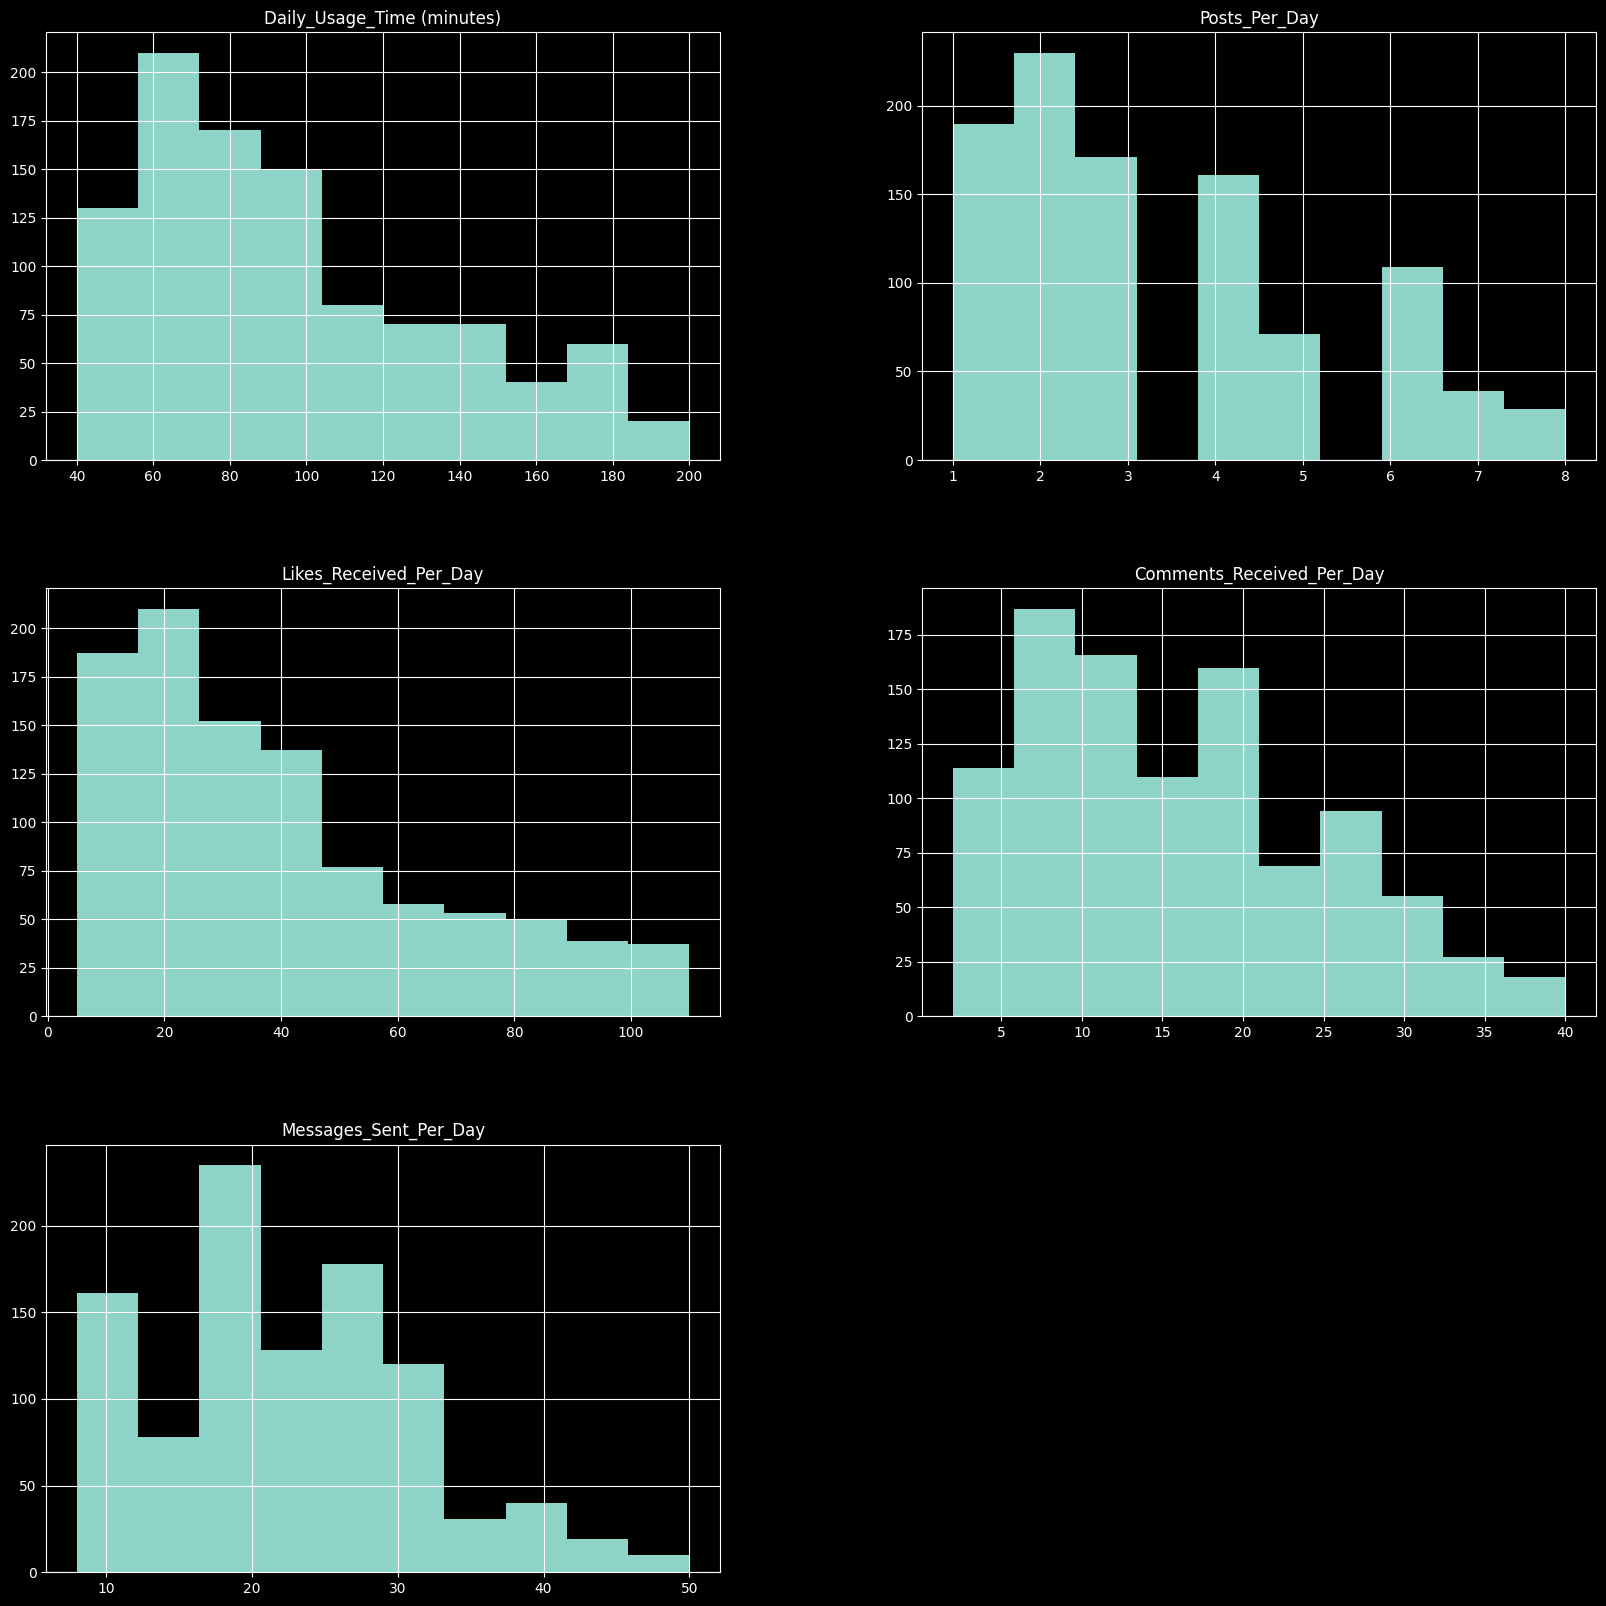

In [345]:
social_data.hist(figsize=(20,20))

<Axes: >

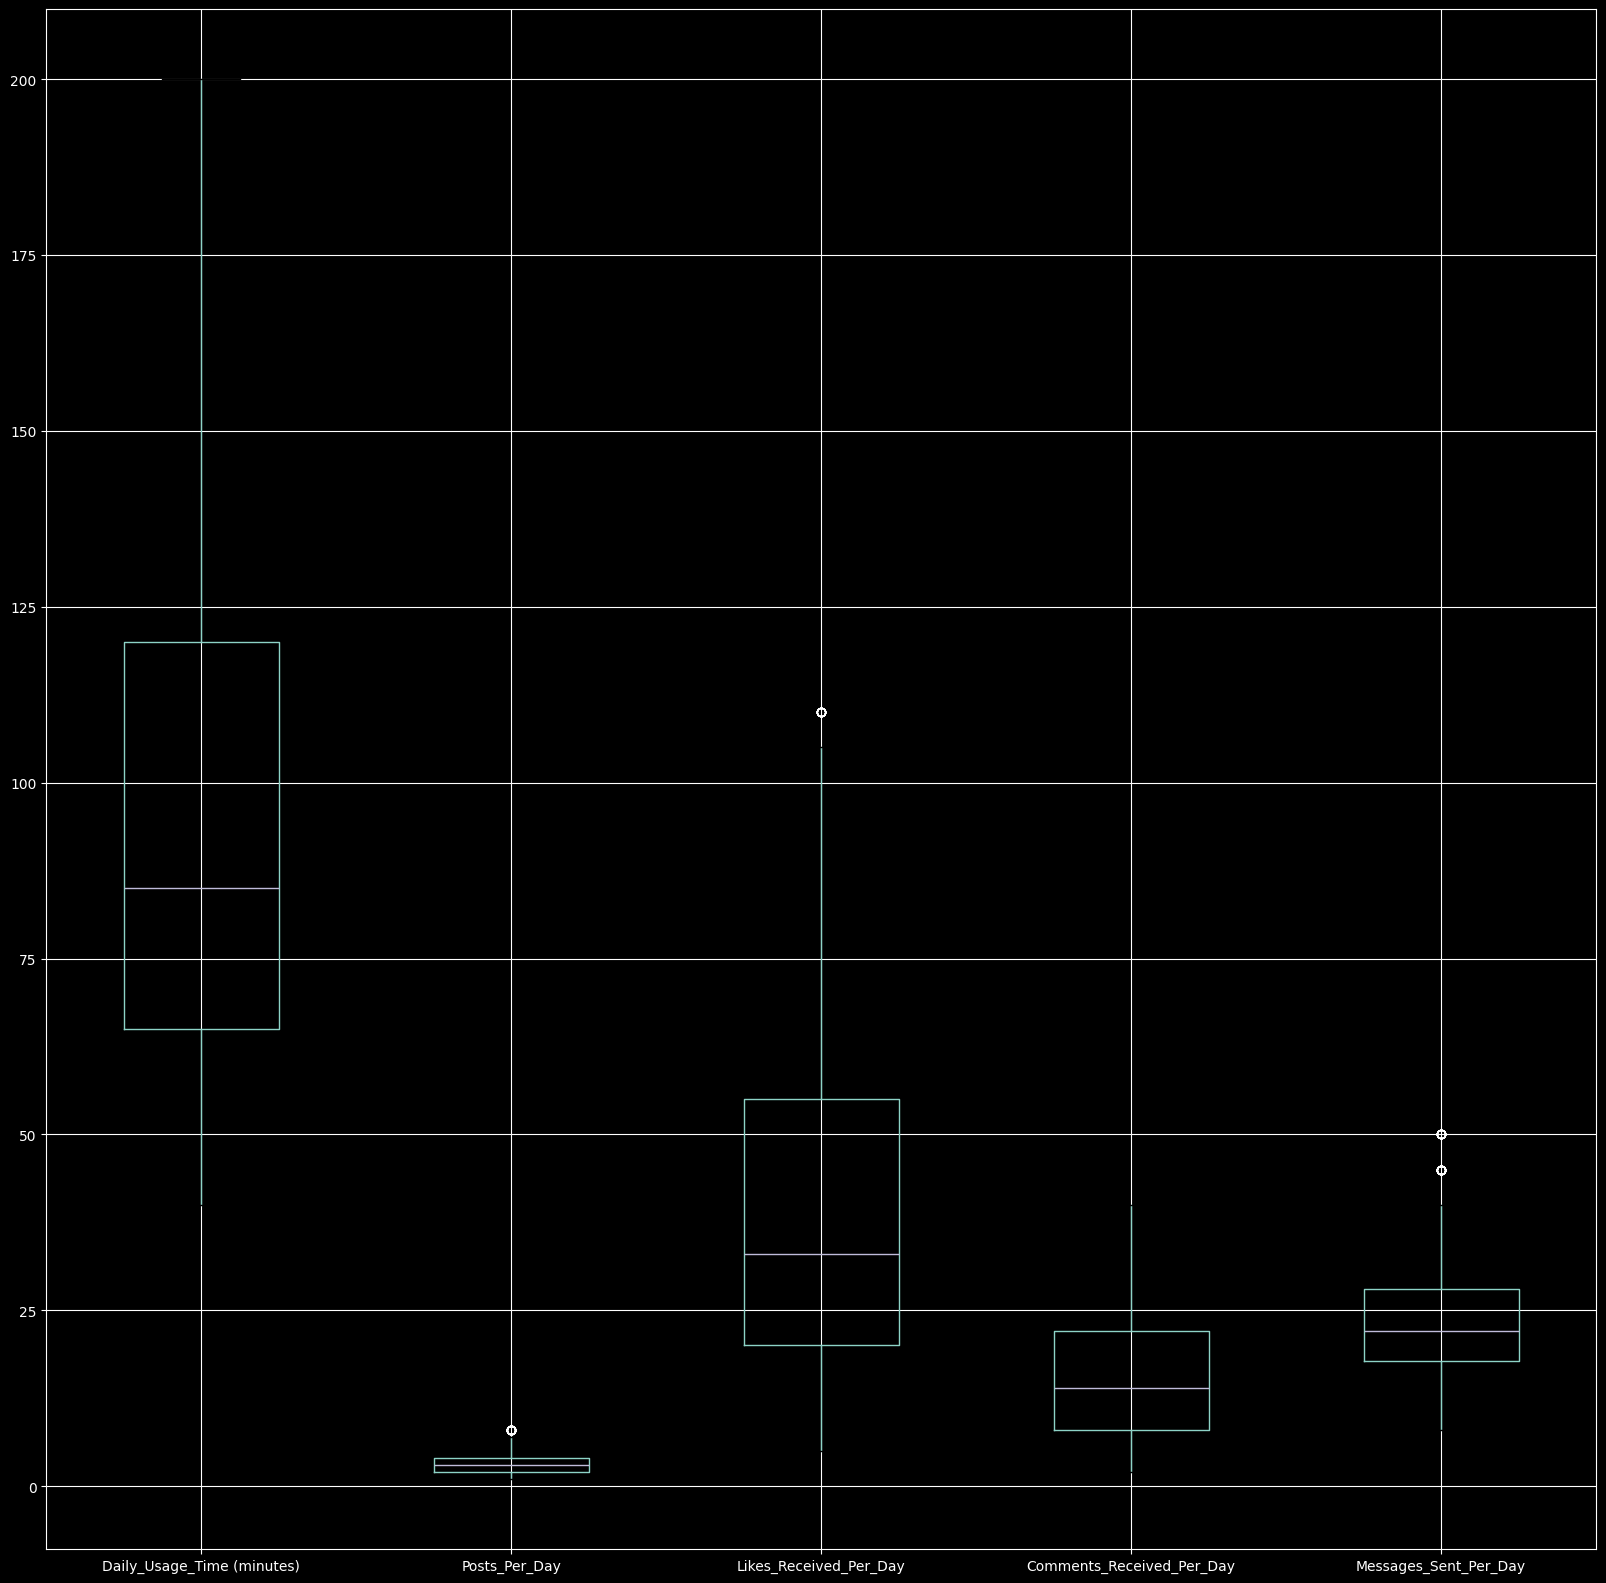

In [346]:
social_data.boxplot(figsize=(20,20))

In [347]:
social_data.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [348]:
social_data.shape

(1001, 10)

In [349]:
def outliers_remove(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    threshold = 1.5
    outliers = data[(data[column] < Q1 - threshold * IQR) | (data[column] > Q3 + threshold * IQR)]
    print(f"outliers : {outliers.shape} fullDatashape : {data.shape}")
    return outliers

In [350]:
outliers_remove(social_data,"Posts_Per_Day").sample(3)

outliers : (29, 10) fullDatashape : (1001, 10)


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
814,814,22,Female,Instagram,180.0,8.0,100.0,38.0,45.0,Happiness
613,614,22,Female,Instagram,180.0,8.0,100.0,38.0,45.0,Happiness
223,224,33,Non-binary,Instagram,190.0,8.0,105.0,36.0,50.0,Happiness


In [351]:
outliers_social = outliers_remove(social_data,"Posts_Per_Day")

outliers : (29, 10) fullDatashape : (1001, 10)


In [352]:

user_ids_to_drop = outliers_social['User_ID']

df = social_data[~social_data['User_ID'].isin(user_ids_to_drop)]


In [353]:
df.sample()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
10,11,23,Female,Twitter,75.0,4.0,35.0,7.0,20.0,Anxiety


In [354]:
df.shape

(972, 10)

In [355]:
df.drop("User_ID",axis=1,inplace=True)

C:\Users\marwa\AppData\Local\Temp\ipykernel_6476\2099615442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("User_ID",axis=1,inplace=True)


In [356]:
df.sample(3)

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
600,25,Female,Instagram,120.0,5.0,50.0,20.0,25.0,Happiness
438,22,Female,Instagram,115.0,3.0,60.0,17.0,30.0,Neutral
238,22,Female,Instagram,115.0,3.0,60.0,17.0,30.0,Neutral


## Anixty Data

In [357]:
Anixty.sample(3)

,Entity,Code,Year,"Current number of cases of anorexia nervosa, in both sexes aged all ages","Current number of cases of bulimia nervosa, in both sexes aged all ages"
698,Bolivia,BOL,1998,3151.6458,13001.241
3057,Kenya,KEN,2017,17860.9530,38636.844
4221,New Zealand,NZL,2011,5881.5386,16533.555


In [358]:
Anixty["Entity"].unique()

array(['Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia & Pacific (WB)',
       'East Timor', 'Eastern Mediterranean Region (WHO)', 'Ecuador',
       'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', '

<Axes: >

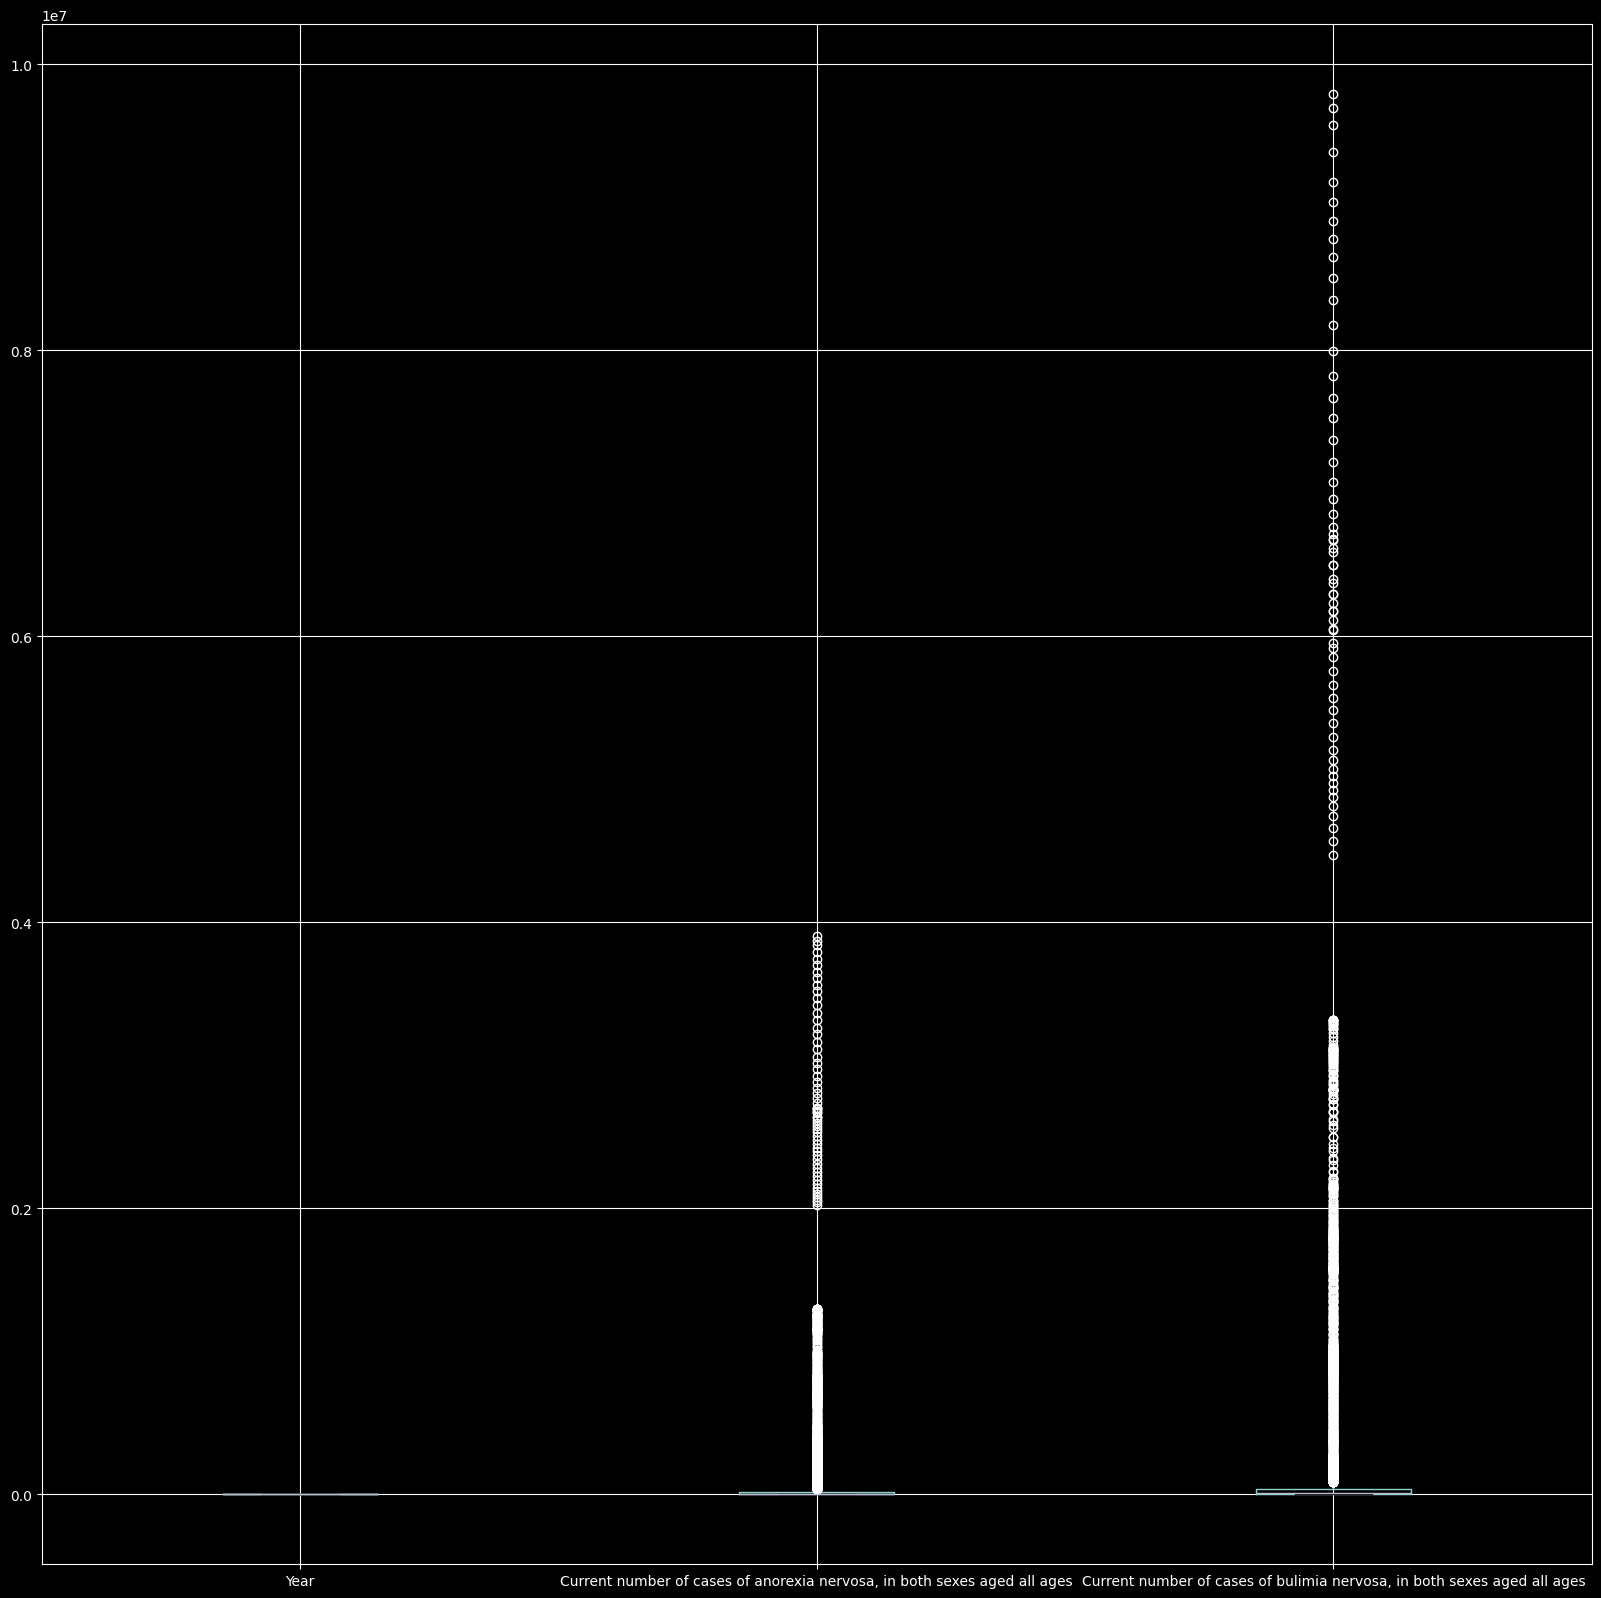

In [359]:
Anixty.boxplot(figsize=(20,20))

In [360]:
len(Anixty["Entity"].unique())

228

In [361]:
Anixty.columns

Index(['Entity', 'Code', 'Year',
       'Current number of cases of anorexia nervosa, in both sexes aged all ages',
       'Current number of cases of bulimia nervosa, in both sexes aged all ages'],
      dtype='object')

In [362]:
outliers_Anixty1 = outliers_remove(Anixty,"Current number of cases of bulimia nervosa, in both sexes aged all ages")
outliers_Anixty2  = outliers_remove(Anixty,"Current number of cases of anorexia nervosa, in both sexes aged all ages")


outliers : (1269, 5) fullDatashape : (6840, 5)
outliers : (1215, 5) fullDatashape : (6840, 5)


In [363]:
code_to_drop = outliers_Anixty1['Code']
Anixty_temp = Anixty[~Anixty['Code'].isin(code_to_drop)]

In [364]:
Anixty_temp.shape

(5370, 5)

In [365]:
code_to_drop2 =  outliers_Anixty2['Code']
Anixty_cleaned = Anixty_temp[~Anixty_temp['Code'].isin(code_to_drop2)]

In [366]:
Anixty_cleaned.shape

(5340, 5)

In [367]:
Anixty_cleaned.sample(3)

,Entity,Code,Year,"Current number of cases of anorexia nervosa, in both sexes aged all ages","Current number of cases of bulimia nervosa, in both sexes aged all ages"
5076,Saint Kitts and Nevis,KNA,1996,26.246752,87.578600
4502,Norway,NOR,1992,4940.701700,12770.979000
1279,Cook Islands,COK,2009,8.717185,17.749813


In [368]:
Anixty_cleaned.columns

Index(['Entity', 'Code', 'Year',
       'Current number of cases of anorexia nervosa, in both sexes aged all ages',
       'Current number of cases of bulimia nervosa, in both sexes aged all ages'],
      dtype='object')

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">3| Visulization</div>

In [369]:
vc = Anixty_cleaned[['Year','Current number of cases of anorexia nervosa, in both sexes aged all ages',
       'Current number of cases of bulimia nervosa, in both sexes aged all ages']].value_counts().nlargest(10)

In [370]:
vc

Year  Current number of cases of anorexia nervosa, in both sexes aged all ages  Current number of cases of bulimia nervosa, in both sexes aged all ages
1990  0.456761                                                                  0.797042                                                                   1
2010  24.589968                                                                 47.443947                                                                  1
      8.503370                                                                  17.318720                                                                  1
      7.274588                                                                  15.957748                                                                  1
      3.545735                                                                  6.600668                                                                   1
      2.996253                                                 

In [371]:
plts = Anixty_cleaned[['Year', 'Current number of cases of anorexia nervosa, in both sexes aged all ages',
       'Current number of cases of bulimia nervosa, in both sexes aged all ages']].sort_values(
       by=['Current number of cases of anorexia nervosa, in both sexes aged all ages', 
           'Current number of cases of bulimia nervosa, in both sexes aged all ages'],
       ascending=False).head(10)


In [372]:
plts

,Year,"Current number of cases of anorexia nervosa, in both sexes aged all ages","Current number of cases of bulimia nervosa, in both sexes aged all ages"
1979,2019,33030.785,67591.450
1978,2018,31829.703,64406.207
6659,2019,31472.148,67427.020
6658,2018,31227.768,66389.690
6657,2017,30996.889,65290.066
6656,2016,30721.059,63951.270
1977,2017,30546.738,61149.688
6655,2015,30436.186,62512.500
6654,2014,30201.729,61212.598
6653,2013,29941.902,59871.484


In [373]:
plts = Anixty_cleaned.drop_duplicates(subset=['Year']).reset_index(drop=True)

In [374]:
plts.duplicated().sum()

0

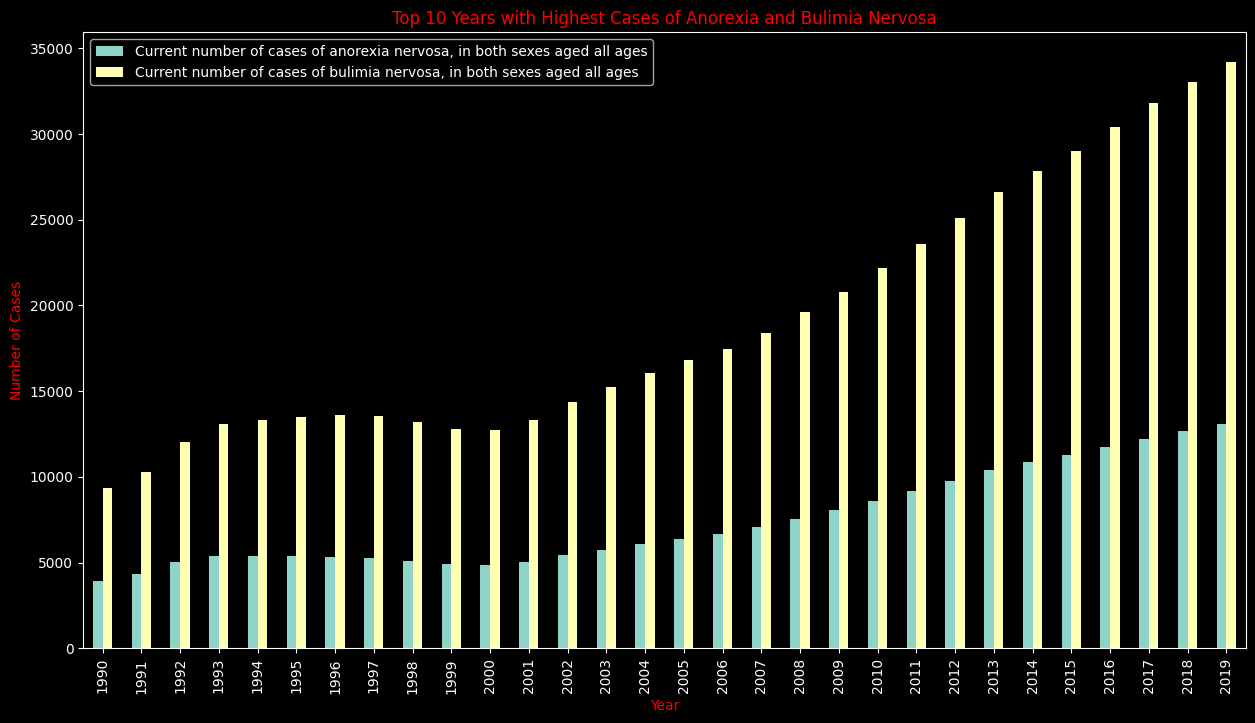

In [375]:

plts.plot(kind='bar', x='Year', figsize=(15, 8))
plt.style.use('dark_background')

# Define more vibrant colors for the bars
colors = ['#33ccff', '#ffcc66']  # You can customize these colors as needed
plt.title('Top 10 Years with Highest Cases of Anorexia and Bulimia Nervosa', color='red')
plt.xlabel('Year', color='red')
plt.ylabel('Number of Cases', color='red')

plt.show()


In [376]:
df.sample(3)

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
607,24,Non-binary,Facebook,110.0,6.0,35.0,16.0,25.0,Sadness
363,26,Female,Snapchat,120.0,4.0,55.0,18.0,30.0,Anxiety
153,33,Female,Instagram,145.0,4.0,65.0,23.0,35.0,Sadness


In [377]:
df.columns

Index(['Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [378]:
plts2 = df[['Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion']].sort_values(
       by=['Comments_Received_Per_Day',"Messages_Sent_Per_Day","Posts_Per_Day","Likes_Received_Per_Day"],
       ascending=False).head(10)


In [379]:
plts2 = df.drop_duplicates(subset=['Age'])


In [380]:
values_to_remove = ['Male', 'Female', 'Non-binary', ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:']

plts2['Age'] = df['Age'].replace(values_to_remove, np.nan)



C:\Users\marwa\AppData\Local\Temp\ipykernel_6476\3407157131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plts2['Age'] = df['Age'].replace(values_to_remove, np.nan)


In [381]:
plts2.dropna(inplace=True)

C:\Users\marwa\AppData\Local\Temp\ipykernel_6476\470514903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plts2.dropna(inplace=True)


In [382]:
plts2.sample()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
2,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral


In [383]:
plts2["Age"].unique()

array(['25', '30', '22', '33', '21', '27', '24', '29', '31', '23', '26',
       '34', '28', '35', '32'], dtype=object)

In [384]:
plts2 = plts2.sort_values("Age")

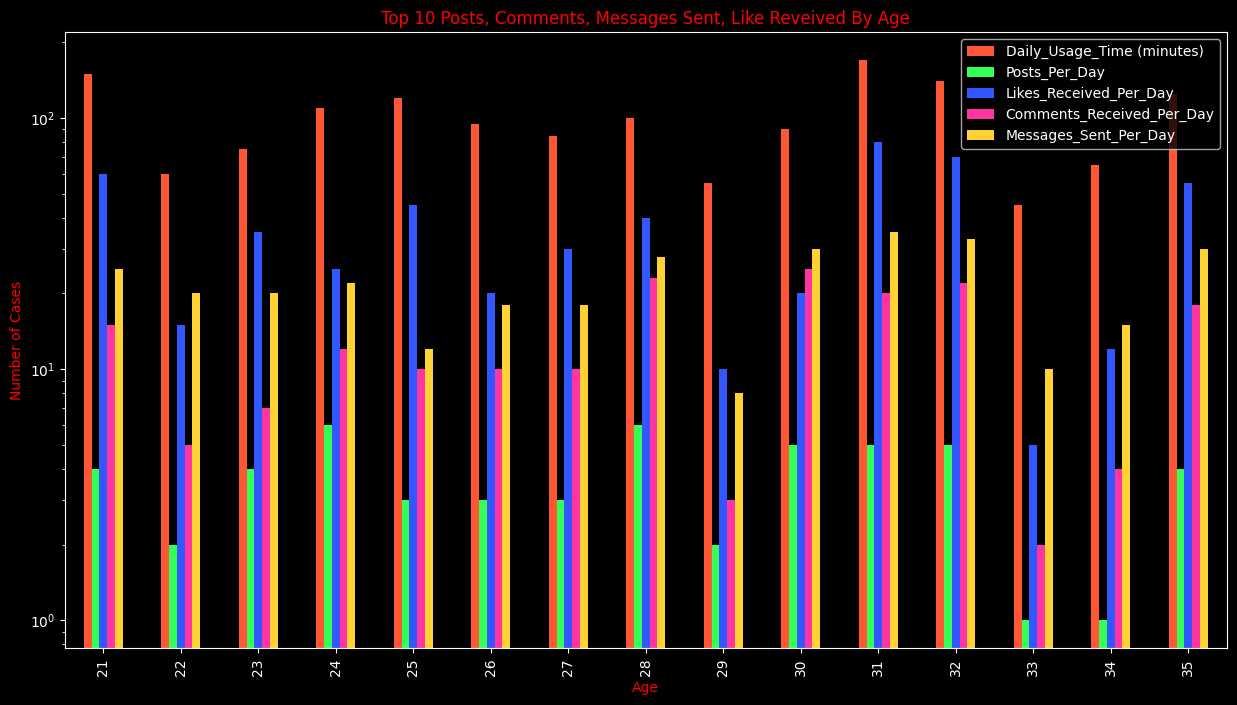

In [385]:
plt.style.use('dark_background')

# Define more vibrant colors for the bars
colors = ['#ff5733', '#33ff57', '#3357ff', '#ff33a1', '#ffd133']  # Customize colors as needed

plts2.plot(kind='bar', x='Age', figsize=(15, 8), color=colors)

plt.title('Top 10 Posts, Comments, Messages Sent, Like Reveived By Age', color='red')
plt.xlabel('Age', color='red')
plt.yscale('log')
plt.ylabel('Number of Cases', color='red')



plt.show()


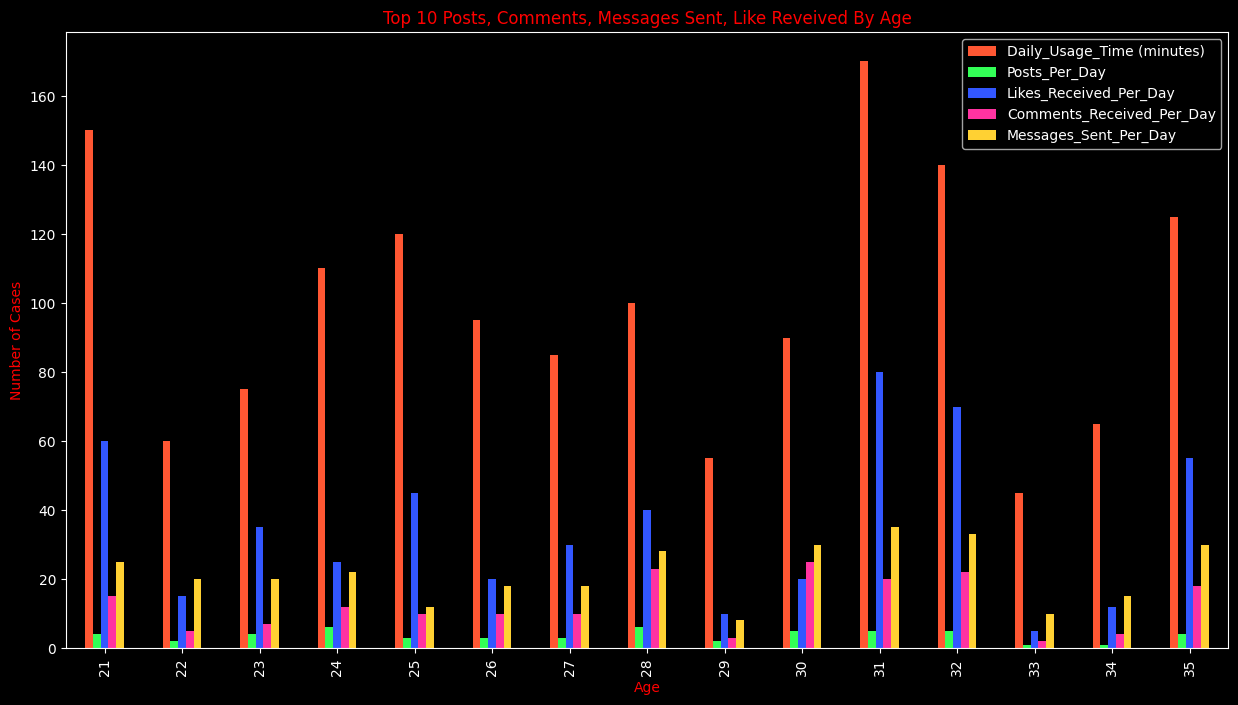

In [386]:
plt.style.use('dark_background')

# Define more vibrant colors for the bars
colors = ['#ff5733', '#33ff57', '#3357ff', '#ff33a1', '#ffd133']  # Customize colors as needed

plts2.plot(kind='bar', x='Age', figsize=(15, 8), color=colors)

plt.title('Top 10 Posts, Comments, Messages Sent, Like Reveived By Age', color='red')
plt.xlabel('Age', color='red')
plt.ylabel('Number of Cases', color='red')



plt.show()


## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">3| Modling</div>

In [387]:
df.head()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
4,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
5,21,Male,Instagram,150.0,4.0,60.0,15.0,25.0,Happiness


In [388]:
df.columns

Index(['Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [389]:
test = pd.read_csv("Datasets/test.csv")
# test.head()
print(len(test.columns))
print(len(social_data.columns))

10
10


In [390]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import preprocessing   
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [391]:
values_to_remove = ['Male', 'Female', 'Non-binary', ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:']

df["Age"] = df['Age'].replace(values_to_remove, np.nan)



C:\Users\marwa\AppData\Local\Temp\ipykernel_6476\1467203859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = df['Age'].replace(values_to_remove, np.nan)


In [392]:
df.dropna(inplace=True)

C:\Users\marwa\AppData\Local\Temp\ipykernel_6476\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [393]:
def label_enco(column):
    return le.fit_transform(df[column])


In [394]:
X = df.drop("Dominant_Emotion",axis=1)
y = df["Dominant_Emotion"]

In [395]:
df["Gender"] = label_enco("Gender")
df["Platform"] = label_enco("Platform")

C:\Users\marwa\AppData\Local\Temp\ipykernel_6476\3239510538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = label_enco("Gender")
C:\Users\marwa\AppData\Local\Temp\ipykernel_6476\3239510538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Platform"] = label_enco("Platform")


In [396]:
X.sample()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
352,29,Non-binary,Facebook,85.0,2.0,27.0,9.0,20.0


In [397]:
y.sample()

120    Anxiety
Name: Dominant_Emotion, dtype: object

In [398]:
le = preprocessing.LabelEncoder()

In [399]:
df.sample()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
725,22,0,5,70.0,3.0,25.0,16.0,15.0,Sadness


In [400]:
df["Age"].unique()

array(['25', '30', '22', '33', '21', '27', '24', '29', '31', '23', '26',
       '34', '28', '35', '32'], dtype=object)